# Final Assignment
Levina Wirjowerdojo - PYTN071ONL010

------------

In this project, I will make an attempt to use machine learning to create a model that predicts which passengers survived the Titanic shipwreck. The data is taken from [Kaggle - Titanic](https://www.kaggle.com/competitions/titanic/overview). 

| Data |  | |
| :--- | :--- | :--- |
| Variable | Definition | Key |
| survival |	Survival |	0 = No, 1 = Yes
| pclass | Ticket class |	1 = 1st, 2 = 2nd, 3 = 3rd
| sex |	Sex | |	
| Age |	Age in years | | 	
| sibsp  |	# of siblings / spouses aboard the Titanic | 	
| parch |	# of parents / children aboard the Titanic 	|
| ticket |	Ticket number | | 	
| fare |	Passenger fare |	|
| cabin |	Cabin number  | |	
| embarked |	Port of Embarkation |	C = Cherbourg, Q = Queenstown, S = Southampton |

#### Variable Notes

- pclass: A proxy for socio-economic status (SES)
    - 1st = Upper
    - 2nd = Middle
    - 3rd = Lower

- age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

- sibsp: The dataset defines family relations in this way...
    - Sibling = brother, sister, stepbrother, stepsister
    - Spouse = husband, wife (mistresses and fiancés were ignored)

- parch: The dataset defines family relations in this way...
    - Parent = mother, father
    - Child = daughter, son, stepdaughter, stepson
    - Some children travelled only with a nanny, therefore parch=0 for them.
   
-----------------------------

### Data Loading

In [1]:
# import required packages
import numpy as np
import pandas as pd
import datetime

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use(['ggplot'])
import seaborn as sns
import itertools
import matplotlib.gridspec as gridspec

# import required sklearn for machine learning model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, recall_score, precision_score, f1_score, accuracy_score, roc_auc_score
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

# to display the decision tree graph
import sklearn.tree as tree
import pydotplus
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz

import pickle
import graphviz

In [2]:
# import training data
df_train=pd.read_csv('train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# check tail
df_train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [4]:
# check its shape
df_train.shape

(891, 12)

In [5]:
# check info
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df_train.keys()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
# check for duplicates 
print(sum(df_train.duplicated()))

df_dupl=df_train[df_train.duplicated(keep='last')]
df_dupl

0


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


There is no duplicates.

In [8]:
# check for uniqueness
df_train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

As there are 891 rows and 891 values for 'PassengerId', we will set 'PassengerId' as the index.

In [9]:
# set PassengerId as index
df_train.set_index('PassengerId', inplace=True)
df_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


----------------------------------------------
### Exploratory Data Analysis

In [10]:
# check keys
df_train.keys()

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
# display head
df_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


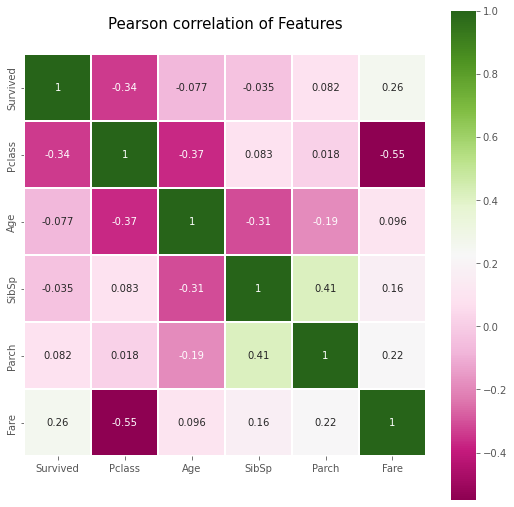

In [12]:
# create heatmap to know which features have strong/weak relationship with one another
%matplotlib inline
corr = df_train.corr()

f, ax = plt.subplots(figsize=(9,9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

_ = sns.heatmap(corr, cmap="PiYG", square=True, ax=ax, annot=True, linewidth=0.1)

plt.title("Pearson correlation of Features", y=1.05, size=15);

In [13]:
# check for null values
df_train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

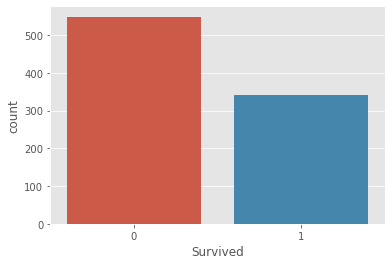

In [14]:
# plot the survivors
x=df_train['Survived']
y=len(x)
ax=sns.countplot(x=x, data=df_train)

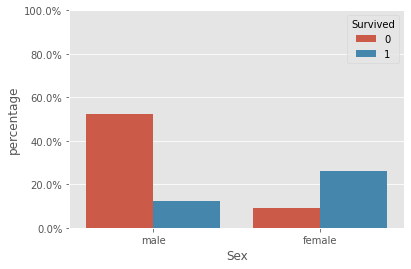

In [15]:
# plot 'sex' 
x=df_train['Sex']
y=len(x)*1
ax=sns.countplot(x=x, data=df_train, hue='Survived')
ax.yaxis.set_ticks(np.linspace(0, y, 6))
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/y));
ax.set_ylabel("percentage");

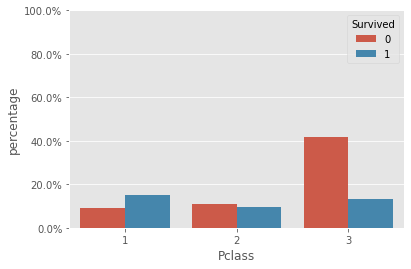

In [16]:
# plot the cabin class data
x=df_train['Pclass']
y=len(x)
ax=sns.countplot(x=x, data=df_train, hue='Survived')
ax.yaxis.set_ticks(np.linspace(0, y, 6))
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/y));
ax.set_ylabel("percentage");

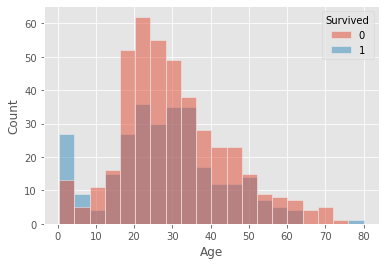

In [17]:
# plot histogram - age
x=df_train['Age']
y=len(x)
ax=sns.histplot(x=x, data=df_train, hue='Survived')

However, 'Age' contains 177 null values. Hence we will try to fill this in with its mode. 

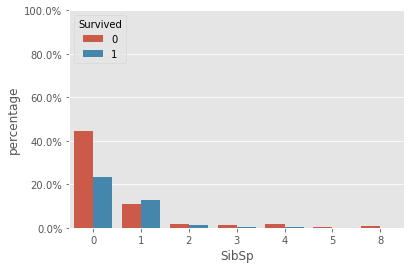

In [18]:
# plot histogram - age
x=df_train['SibSp']
y=len(x)
ax=sns.countplot(x=x, data=df_train, hue='Survived')
ax.yaxis.set_ticks(np.linspace(0, y, 6))
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/y));
ax.set_ylabel("percentage");

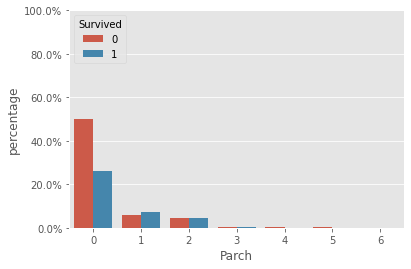

In [19]:
# plot histogram - age
x=df_train['Parch']
y=len(x)
ax=sns.countplot(x=x, data=df_train, hue='Survived')
ax.yaxis.set_ticks(np.linspace(0, y, 6))
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/y));
ax.set_ylabel("percentage");

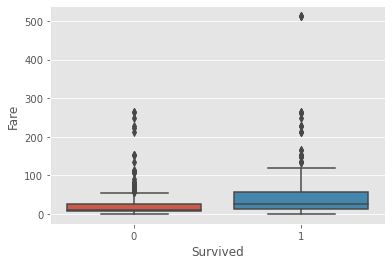

In [20]:
# plot the fare data
sns.boxplot(data=df_train, y="Fare", x="Survived")
plt.show()

In [21]:
# check for the average price paid by the non-survivors
df_train[df_train['Survived']==0].describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,549.0,549.000000,424.000000,549.000000,549.000000,549.000000
mean,0.0,2.531876,30.626179,0.553734,0.329690,22.117887
std,0.0,0.735805,14.172110,1.288399,0.823166,31.388207
min,0.0,1.000000,1.000000,0.000000,0.000000,0.000000
25%,0.0,2.000000,21.000000,0.000000,0.000000,7.854200
50%,0.0,3.000000,28.000000,0.000000,0.000000,10.500000
75%,0.0,3.000000,39.000000,1.000000,0.000000,26.000000
max,0.0,3.000000,74.000000,8.000000,6.000000,263.000000


In [22]:
# check for the average price paid by the survivors
df_train[df_train['Survived']==1].describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,342.0,342.000000,290.000000,342.000000,342.000000,342.000000
mean,1.0,1.950292,28.343690,0.473684,0.464912,48.395408
std,0.0,0.863321,14.950952,0.708688,0.771712,66.596998
min,1.0,1.000000,0.420000,0.000000,0.000000,0.000000
25%,1.0,1.000000,19.000000,0.000000,0.000000,12.475000
50%,1.0,2.000000,28.000000,0.000000,0.000000,26.000000
75%,1.0,3.000000,36.000000,1.000000,1.000000,57.000000
max,1.0,3.000000,80.000000,4.000000,5.000000,512.329200


In [23]:
# check 'Cabin' data
df_train['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

As the data is irregular, we will drop this column.

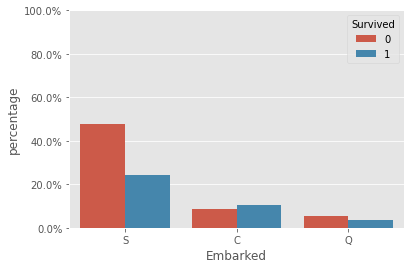

In [24]:
# plot where they embarked
x=df_train['Embarked']
y=len(x)
ax=sns.countplot(x=x, data=df_train, hue='Survived')
ax.yaxis.set_ticks(np.linspace(0, y, 6))
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/y));
ax.set_ylabel("percentage");

Based on the graphs above, we see that:
- most features have weak relationship with one another, except for Pclass and Fare 
- there are more people who did not survive compared to the ones that survive
- the number of female survivors are far greater than male survivors
- most passengers in class 3 did not survive, but there are almost equal amount of survivors from class 1 and 3
- most passengers come onboard without siblings/spouse
- most passengers travel without their parents/child
- the median price that the survivors vs the non-survivors paid seem to differ, when we looked into the statistics using the .describe option, we know that most survivors paid almost 2x compared to the non-survivors
- most survivors embarked in Southampton (this is the first embarkation point).

However, we have yet to fill/remove the columns/rows that contain null values. Hence, we will proceed in checking those rows/columns

In [25]:
# check for null values
df_train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

As there are null values, our strategy is to:
- fill 'Age' with its median
- fill 'Embarked' with its mode
- remove 'Cabin' (there are only 891 rows on the train data and 687 are null values -- test data also contains a similar ratio)

In [26]:
# calculate the replacing values
# calculate median of age
age_med=df_train['Age'].median()
age_med
# calculate mode
em_mode=df_train['Embarked'].mode()
em_mode[0]

print(age_med, em_mode[0])

28.0 S


In [27]:
# replace null values
df_train['Age']=df_train['Age'].fillna(age_med)
df_train['Embarked']=df_train['Embarked'].fillna(em_mode[0])

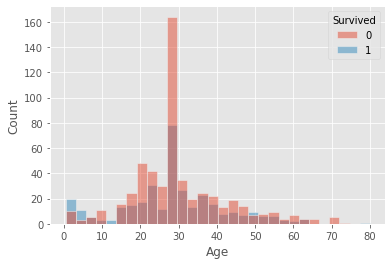

In [28]:
# plot histogram - age
x=df_train['Age']
y=len(x)
ax=sns.histplot(x=x, data=df_train, hue='Survived')

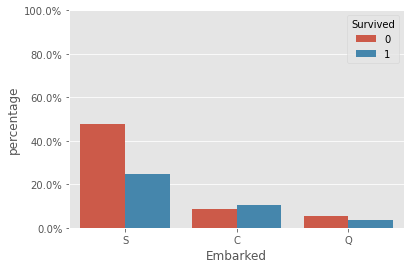

In [29]:
# plot where they embarked
x=df_train['Embarked']
y=len(x)
ax=sns.countplot(x=x, data=df_train, hue='Survived')
ax.yaxis.set_ticks(np.linspace(0, y, 6))
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/y));
ax.set_ylabel("percentage");

From the two graphs, we know that:
- 'Age' - by filling in the null values we skewed the distribution of the data, hence this column will be dropped. From the heat map that we previously created, we are also unable to fill in based on any other features (data) that are available
- 'Embarked' - as there is only 2 rows that needs to be filled, this will be used for our ML model.

In [30]:
# check data types
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 115.8+ KB


In regards to data type, there are a few that are categorised as objects, from here we can:
- remove 'Name' - we don't see the relevance of including name in our features as it is unique
- encode 'Sex' 
- remove 'Ticket' - there is no logical reason on why this ticket number would affect the result of the ML model.

--------
### Machine Learning

<b>Goal</b>: predict if the passenger will survive or not (variable y).

Data preparation:
- select data - based on the previous analysis we will drop:
    - age
    - name
    - ticket
    - cabin
- encode non-numerical values

In [31]:
# clean up the data
df_clean=df_train.drop(columns=['Age', 'Name', 'Ticket', 'Cabin'])
df_clean.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,0,3,male,1,0,7.2500,S
2,1,1,female,1,0,71.2833,C
3,1,3,female,0,0,7.9250,S
4,1,1,female,1,0,53.1000,S
5,0,3,male,0,0,8.0500,S


In [32]:
# encode all columns that contain non-numerical value
encoder=LabelEncoder()

all_labelenconders={}

cols=['Sex', 'Embarked']

for name in cols:
    encoder=LabelEncoder()
    all_labelenconders[name]=encoder

    encoder.fit( df_clean[name] )
    df_clean[name +'_en'] = encoder.fit_transform( df_clean[name] )
    
    print("Class for "+ name+" "+ encoder.classes_)

['Class for Sex female' 'Class for Sex male']
['Class for Embarked C' 'Class for Embarked Q' 'Class for Embarked S']


In [33]:
# check the keys
df_clean.keys()

Index(['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'Sex_en', 'Embarked_en'],
      dtype='object')

In [34]:
# set features and target
features=df_clean[['Pclass', 'SibSp', 'Parch', 'Fare', 'Embarked_en','Sex_en']]
target=df_clean['Survived']

In [35]:
# check features
features.head()

,Pclass,SibSp,Parch,Fare,Embarked_en,Sex_en
PassengerId,,,,,,
1,3,1,0,7.2500,2,1
2,1,1,0,71.2833,0,0
3,3,0,0,7.9250,2,0
4,1,1,0,53.1000,2,0
5,3,0,0,8.0500,2,1


In [36]:
# split train and test data
x_train, x_test, y_train, y_test=train_test_split(features, target, random_state=0, test_size=0.2)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(712, 6) (179, 6) (712,) (179,)


As SVM requires all the data to be in the same scale, we are going to normalise the 'Fare' column.

In [37]:
# normalize 'Fare' for SVM
features_svm=features.copy()
features_svm['Fare_norm']=(df_clean['Fare']-df_clean['Fare'].min())/(df_clean['Fare'].max() -df_clean['Fare'].min())
features_svm.drop(columns='Fare', inplace=True)
features_svm.head()

,Pclass,SibSp,Parch,Embarked_en,Sex_en,Fare_norm
PassengerId,,,,,,
1,3,1,0,2,1,0.014151
2,1,1,0,0,0,0.139136
3,3,0,0,2,0,0.015469
4,1,1,0,2,0,0.103644
5,3,0,0,2,1,0.015713


In [38]:
# split train and test data
x_train_svm, x_test_svm, y_train_svm, y_test_svm=train_test_split(features_svm, target, random_state=0, test_size=0.2)
print(x_train_svm.shape, x_test_svm.shape, y_train_svm.shape, y_test_svm.shape)

(712, 6) (179, 6) (712,) (179,)


#### Create Tool for ML Model
- confusion matrix
- knn table

In [39]:
# visualise confusion matrix
def visualizeCM(cm):
    nolabels=len(cm)
    fig, ax=plt.subplots(figsize=(nolabels,nolabels))
    ax.imshow(cm)
    ax.grid(False)
    ax.set_xlabel('Predicted outputs', color='black')
    ax.set_ylabel('Actual outputs', color='black')
    ax.xaxis.set(ticks=range(nolabels))
    ax.yaxis.set(ticks=range(nolabels))
    ax.set_xlim(-0.5, nolabels-0.5)
    ax.set_ylim(nolabels-0.5, -0.5)
    for i in range(nolabels):
        for j in range(nolabels):
            ax.text(j, i, cm[i,j], ha='center', va='center', color='white')
    plt.show()
    np.array(cm)

In [40]:
# create the accuracy calculation and plot
def knnTable(maxK, features, target):
    list_score=[]
    for n in range(1,maxK):
        model_knn=KNeighborsClassifier(n_neighbors=n).fit(features, target) # by default KNeighbors will be set at 5
        score=model_knn.score(features, target)

        # print("KNN with neighbor: ", n, " score:", score)
        list_score.append(score)

    plt.plot(range(1,maxK), list_score, marker="o")
    plt.xticks(range(1, maxK,2))
    plt.xlabel("Number of neighbors")
    plt.ylabel("Accuracy score")
    plt.title("KNN score vs K table")

In [41]:
# create a function to score accuracy, recall, precision, f1_score
all_scores={}

def scoreStorage(target, y_pred):
    # storing the accuracy, recall precision score
    accuracy=accuracy_score(target, y_pred)
    recall=recall_score(target, y_pred, average=None)
    precision=precision_score(target, y_pred, average=None)
    f1=f1_score(target, y_pred, average=None)
    auroc=roc_auc_score(y_test, y_pred)
    metrics = {"accuracy": accuracy, "auc_roc": auroc}
    for z, m in zip(["recall", "precision", "f1_score"], [recall, precision, f1]):
        for i in [0, 1]:
            metrics[f'{z}_{i}'] = m[i]
        
    return metrics

In [42]:
# create a dictionary to store overfitting (y/n) information
overfitting={}    

We will start with Random Forest as it will give out % based on its importance.

--------------------------------------
## Train Dataset
The algorithms that will be used to create the ML model for this specific data are:
- Random Forest
- Decision Tree
- Logistic Regression
- K-Nearest Neighbor
- Support Vector Machine
- Naive Bayes

Model criteria:
- accuracy > 75%

There are more tools to evaluate our machine learning model, we will also try to evaluate it not only based on accuracy, but also on recall, precision, f1-score, AUC - ROC curve ([Source](https://towardsdatascience.com/how-to-evaluate-your-machine-learning-models-with-python-code-5f8d2d8d945b))

Terms:
- accuracy: the fraction of predictions that a model got right
- recall: What proportion of actual positives was identified correctly?
- precision: What proportion of positive identifications was actually correct?
- f1-score: a measure of a test’s accuracy — it is the harmonic mean of precision and recall
- AUC - ROC curve: a performance measurement for the classification problems at various threshold settings. It tells how much the model is capable of distinguishing between classes ([Source](https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5)).


### Random Forest

              precision    recall  f1-score   support

           0       0.86      0.85      0.86       110
           1       0.77      0.78      0.78        69

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179

[[94 16]
 [15 54]]


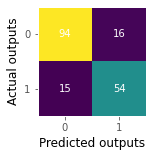

AUC - ROC score 0.8185770750988142


In [43]:
# create model
model_rf=RandomForestClassifier(random_state=0).fit(x_train, y_train)
model_rf

# evaluate model
y_pred=model_rf.predict(x_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))
visualizeCM(confusion_matrix(y_test, y_pred))
print("AUC - ROC score", roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       110
           1       0.82      0.68      0.75        69

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.80       179
weighted avg       0.82      0.82      0.82       179

[[100  10]
 [ 22  47]]


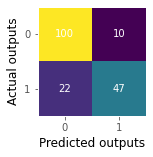

AUC - ROC score 0.795125164690382


In [44]:
# create model
model_rf_md=RandomForestClassifier(max_depth=6, random_state=0).fit(x_train, y_train)
model_rf_md

# evaluate model
y_pred=model_rf_md.predict(x_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))
visualizeCM(confusion_matrix(y_test, y_pred))
print("AUC - ROC score", roc_auc_score(y_test, y_pred))

After changing the max_depth value (2-8) we see that the accuracy is decreasing, hence, we will use the default.

              precision    recall  f1-score   support

           0       0.86      0.85      0.86       110
           1       0.77      0.78      0.78        69

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179

[[94 16]
 [15 54]]


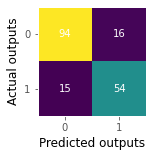

AUC - ROC score 0.8185770750988142


In [45]:
# create model
model_rf=RandomForestClassifier(random_state=0).fit(x_train, y_train)
model_rf

# evaluate model
y_pred=model_rf.predict(x_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))
visualizeCM(confusion_matrix(y_test, y_pred))
print("AUC - ROC score", roc_auc_score(y_test, y_pred))

In [46]:
# store the evaluation metrics
all_scores["RF"] = scoreStorage(y_test, y_pred)

##### Overfitting Test
- Evaluate the model using the train data

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       439
           1       0.93      0.87      0.90       273

    accuracy                           0.92       712
   macro avg       0.93      0.91      0.92       712
weighted avg       0.92      0.92      0.92       712



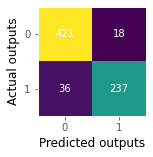

In [47]:
# evaluate model
y_pred=model_rf.predict(x_train)

print(classification_report(y_train, y_pred))
visualizeCM(confusion_matrix(y_train, y_pred))

Accuracy difference between the two model is up to 7%, this indicates that the model is overfitting.

In [48]:
# store overfitting information
overfitting["RF"]="yes"
print(overfitting)

{'RF': 'yes'}


In [49]:
# check for feature importances
model_rf.feature_importances_

array([0.09099679, 0.06475536, 0.06374356, 0.41058101, 0.04225237,
       0.32767091])

In [50]:
# create a dataframe for the feature importances
df_imp=pd.DataFrame({"feature name": features.columns, "% importance": model_rf.feature_importances_}).sort_values(by="% importance", ascending=False)
df_imp

,feature name,% importance
3,Fare,0.410581
5,Sex_en,0.327671
0,Pclass,0.090997
1,SibSp,0.064755
2,Parch,0.063744
4,Embarked_en,0.042252


In [51]:
# set feature names as index
df_imp.set_index("feature name", inplace=True)

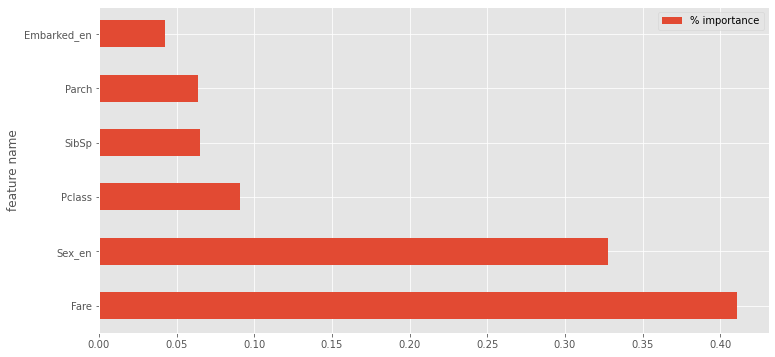

In [52]:
# plot the importance dataframe from lowest to highest
df_imp.plot(kind='barh', figsize=(12,6));

From here we know that <b>'Fare'</b> plays an important part in determining whether the passenger survives or not. This is then followed by <b>'Sex'</b> and <b>'Pclass'</b>, where it has a correlation where passenger will pay more if there on the First Class, etc. The next two features (<b>'SibSp', 'Parch'</b>) show almost the same level of importance (~0.06%). When compared with the first two features, it has a significant difference in importance. Last, <b>'Embarked'</b> seems to be the least influential towards the results. This tells us that whether the passenger boarded the ship earlier (in Southampton), or on the last port () before it went on its journey to America did not have significant impact in determining whether the passenger survives or not.

#### Analysis:
- model accuracy is at 84%
- after trying few max_depth, default gives out the highest model accuracy
- based on feature importances, fare and sex are the two most influential factors in determining whether someone survives/not
- model is overfitting as there is a 7% difference between the two accuracy scores
- as there are only six features, we will keep all features for future ML model creation.

We will then continue with Decision Tree algorithm as Random Forest is like boostrapping algorithm with Decision Tree ([source](https://www.analyticsvidhya.com/blog/2014/06/introduction-random-forest-simplified/?utm_source=blog&utm_medium=beginners-guide-random-forest-hyperparameter-tuning)).


-------------------------------
### Decision Tree

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       110
           1       0.81      0.75      0.78        69

    accuracy                           0.84       179
   macro avg       0.83      0.82      0.83       179
weighted avg       0.84      0.84      0.84       179



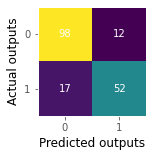

AUC - ROC score 0.822266139657444


In [53]:
# create and train model
model_tree=DecisionTreeClassifier().fit(x_train, y_train)

# evaluate model
y_pred=model_tree.predict(x_test)

print(classification_report(y_test, y_pred))
visualizeCM(confusion_matrix(y_test, y_pred))
print("AUC - ROC score", roc_auc_score(y_test, y_pred))

Model accuracy is at 83%. However, we may tune it further by changing its max depth.

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       110
           1       0.74      0.74      0.74        69

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



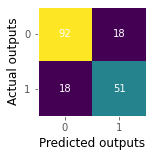

AUC - ROC score 0.7877470355731225


In [54]:
# create and train model
model_tree_md=DecisionTreeClassifier(max_depth=4).fit(x_train, y_train)

# evaluate model
y_pred=model_tree_md.predict(x_test)

print(classification_report(y_test, y_pred))
visualizeCM(confusion_matrix(y_test, y_pred))
print("AUC - ROC score", roc_auc_score(y_test, y_pred))

After few trials of max_depth, we found that accuracy score remains flat after n=4. Accuracy score is at its highest (80%) starting from n=4. However, this is lower than when we left it as default. 

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       110
           1       0.80      0.74      0.77        69

    accuracy                           0.83       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.83      0.83      0.83       179



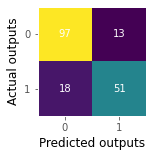

AUC - ROC score 0.8104743083003952


In [55]:
# create and train model
model_tree=DecisionTreeClassifier().fit(x_train, y_train)

# evaluate model
y_pred=model_tree.predict(x_test)

print(classification_report(y_test, y_pred))
visualizeCM(confusion_matrix(y_test, y_pred))
print("AUC - ROC score", roc_auc_score(y_test, y_pred))

In [56]:
# store the evaluation metrics
all_scores["DT"] = scoreStorage(y_test, y_pred)

##### Overfitting Test
- Evaluate the model using the train data

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       439
           1       0.94      0.86      0.90       273

    accuracy                           0.92       712
   macro avg       0.93      0.91      0.92       712
weighted avg       0.92      0.92      0.92       712



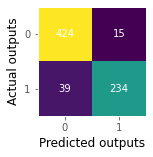

In [57]:
# evaluate model
y_pred=model_tree.predict(x_train)

print(classification_report(y_train, y_pred))
visualizeCM(confusion_matrix(y_train, y_pred))

There seems to be a 9% accuracy between the train and test data, hence this can also be considered overfitting.

In [58]:
# store overfitting information
overfitting["DT"]="yes"
print(overfitting)

{'RF': 'yes', 'DT': 'yes'}


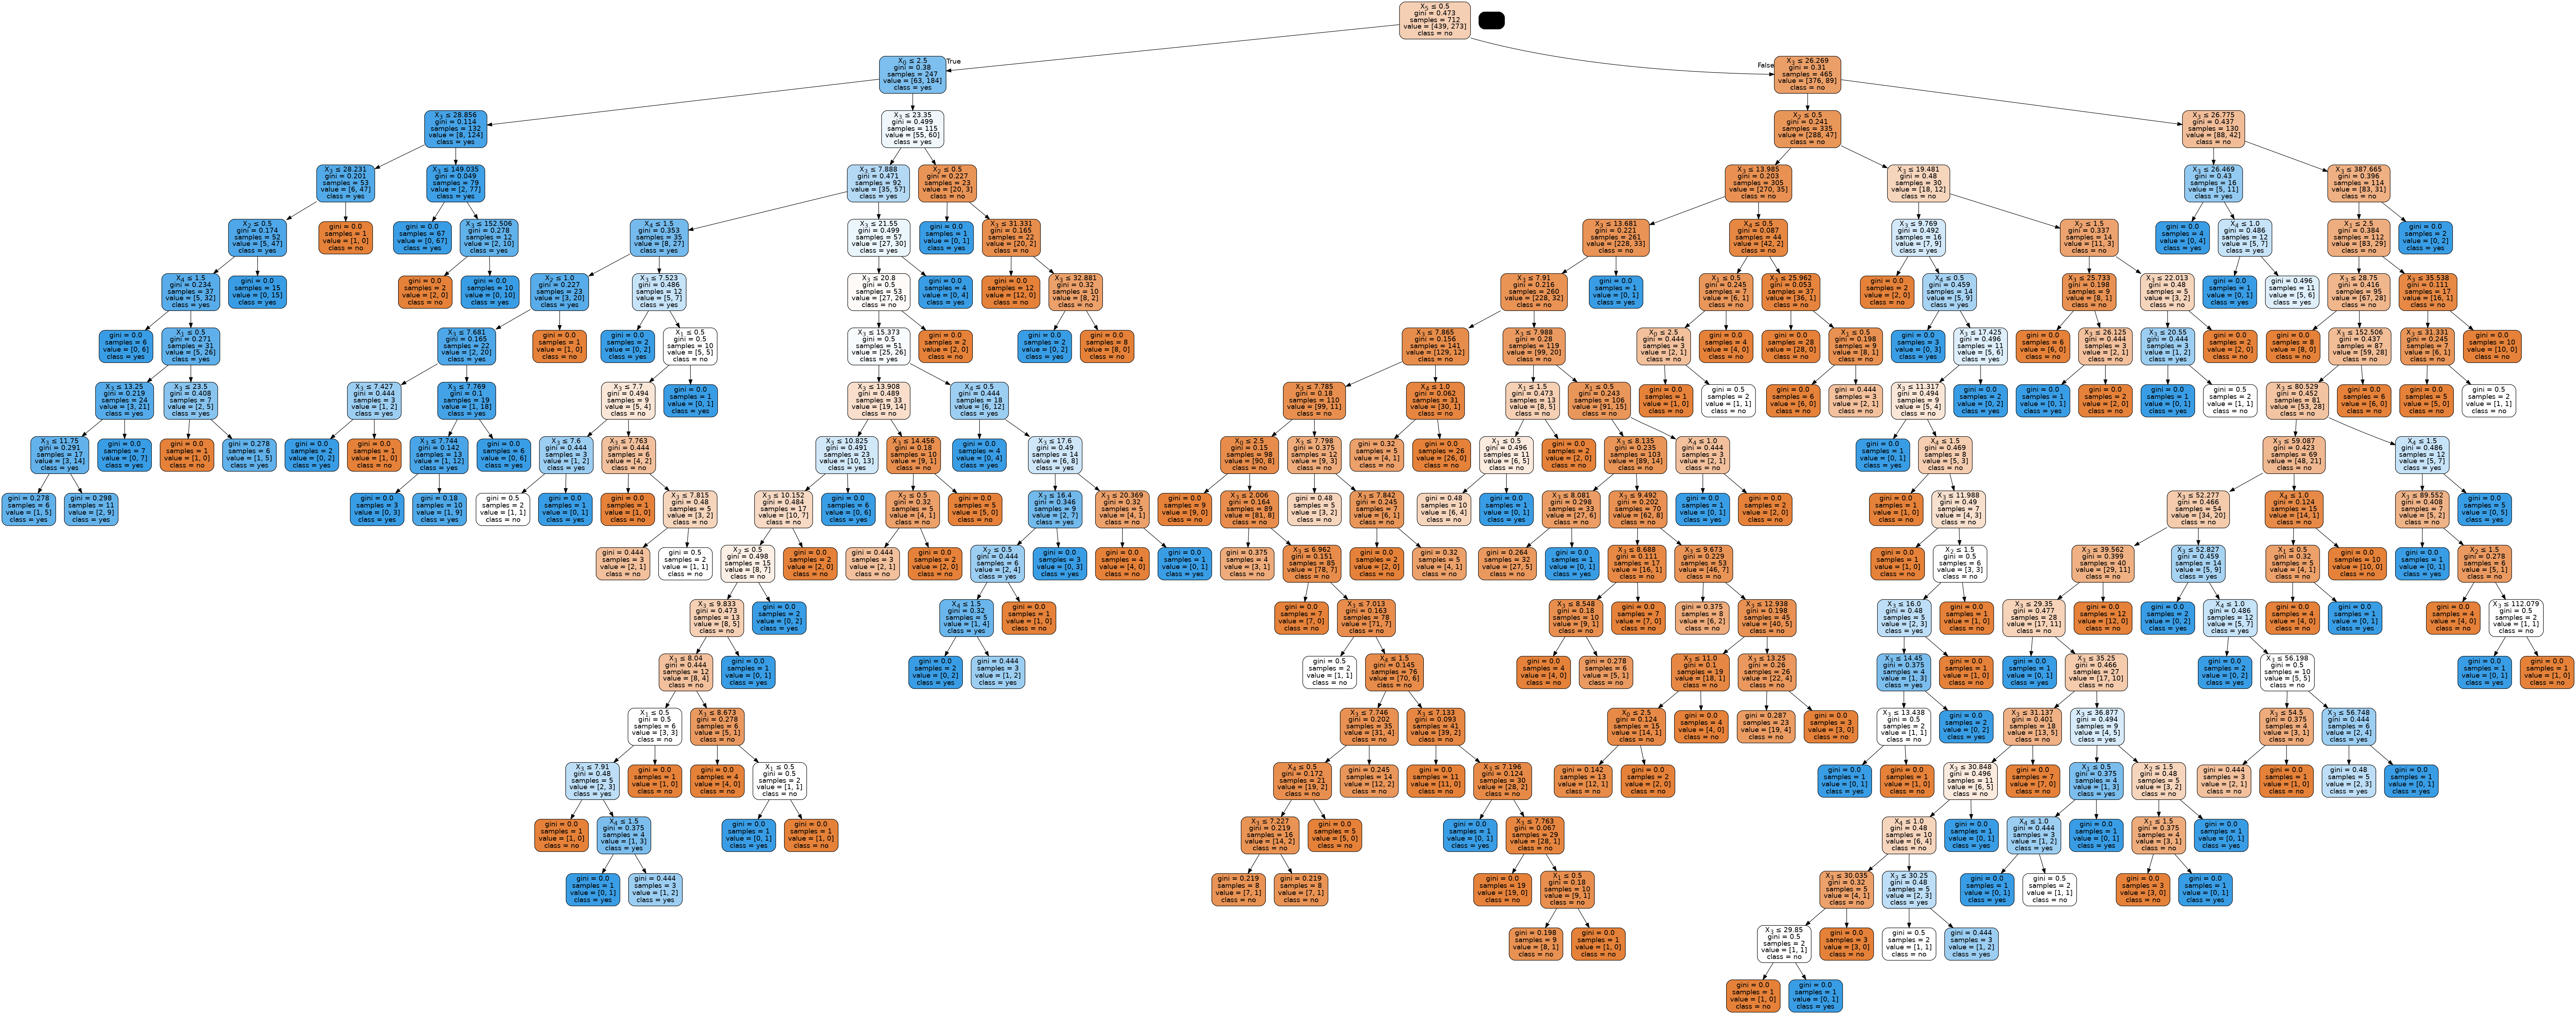

In [61]:
# visualise the Decision Tree

# the tree(s) can be visualised
dot_data=StringIO()
tree.export_graphviz(model_tree,
                    out_file=dot_data,
                    class_names=["no", "yes"],
                    filled=True,
                    rounded=True,
                    special_characters=True)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

#### Analysis:
- model accuracy is at 83%
- model is most likely overfitting as there is a high difference between the accuracy scores (9%)
- with a high auc-roc score (~82%) it implies that this model is capable to distinguish between classes more accurately. 

-------------------
### Logistic Regression
As Logistic Regression has more than one solver, we will test the model using all solver available.

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       110
           1       0.76      0.70      0.73        69

    accuracy                           0.80       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.80      0.80      0.80       179



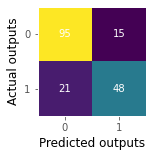

AUC - ROC score 0.7796442687747035


In [62]:
# train and create model
model_lr_lbfgs=LogisticRegression(solver='lbfgs').fit(x_train, y_train)

# evaluate
y_pred=model_lr_lbfgs.predict(x_test)
print(classification_report(y_test, y_pred))
visualizeCM(confusion_matrix(y_test, y_pred))
print("AUC - ROC score", roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       110
           1       0.76      0.70      0.73        69

    accuracy                           0.80       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.80      0.80      0.80       179



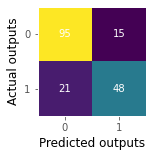

AUC - ROC score 0.7796442687747035


In [63]:
# train and create model
model_lr=LogisticRegression(solver='liblinear').fit(x_train, y_train)

# evaluate
y_pred=model_lr_lbfgs.predict(x_test)
print(classification_report(y_test, y_pred))
visualizeCM(confusion_matrix(y_test, y_pred))
print("AUC - ROC score", roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       110
           1       0.76      0.70      0.73        69

    accuracy                           0.80       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.80      0.80      0.80       179



/home/law/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


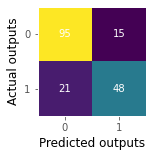

AUC - ROC score 0.7796442687747035


In [64]:
# train and create model
model_lr=LogisticRegression(solver='sag').fit(x_train, y_train)

# evaluate
y_pred=model_lr_lbfgs.predict(x_test)
print(classification_report(y_test, y_pred))
visualizeCM(confusion_matrix(y_test, y_pred))
print("AUC - ROC score", roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       110
           1       0.76      0.70      0.73        69

    accuracy                           0.80       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.80      0.80      0.80       179



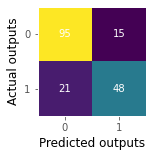

AUC - ROC score 0.7796442687747035


In [65]:
# train and create model
model_lr_lbfgs=LogisticRegression(solver='lbfgs').fit(x_train, y_train)

# evaluate
y_pred=model_lr_lbfgs.predict(x_test)
print(classification_report(y_test, y_pred))
visualizeCM(confusion_matrix(y_test, y_pred))
print("AUC - ROC score", roc_auc_score(y_test, y_pred))

After testing the model against all solvers, we concluded that all models yield to the same accuracy, hence, we will leave it at default (solver='lbfgs'). Now let's check for overfitting.

In [66]:
# store the evaluation metrics
all_scores["LR"] = scoreStorage(y_test, y_pred)

##### Overfitting Test
- Evaluate the model using the train data

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       439
           1       0.77      0.67      0.72       273

    accuracy                           0.80       712
   macro avg       0.79      0.77      0.78       712
weighted avg       0.80      0.80      0.79       712



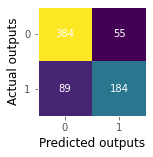

In [67]:
# evaluate
y_pred=model_lr_lbfgs.predict(x_train)
print(classification_report(y_train, y_pred))

visualizeCM(confusion_matrix(y_train, y_pred))

There seems to be no difference in accuracy between the train and test data, hence this model is not overfitting.

In [68]:
# store overfitting information
overfitting["LR"]="no"
print(overfitting)

{'RF': 'yes', 'DT': 'yes', 'LR': 'no'}


#### Analysis:
- all models resulted in 80% accuracy
- precision, recall, f1-score also give out the same value for all models
- model does not seem to overfit as there is no difference in accuracy scores (both remains a 80%) once tested against the training dataset
- auc - roc score is at ~78%, although this is considerably high, it is lower than the previous two algorithms.

----------------------------------------
### K-Nearest Neighbor
We may try few number of neighbors values.

              precision    recall  f1-score   support

           0       0.77      0.86      0.82       110
           1       0.73      0.59      0.66        69

    accuracy                           0.76       179
   macro avg       0.75      0.73      0.74       179
weighted avg       0.76      0.76      0.75       179



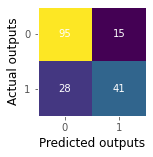

AUC - ROC score 0.7289196310935441


In [69]:
# train and create model using test and train data
model_knn=KNeighborsClassifier().fit(x_train, y_train)

# evaluate
y_pred=model_knn.predict(x_test)
print(classification_report(y_test, y_pred))
visualizeCM(confusion_matrix(y_test, y_pred))
print("AUC - ROC score", roc_auc_score(y_test, y_pred))

Using the default number of neighbor (n=5), we achieved an 76% model accuracy. However, to get the optimum number of neighbor, we may also try to iterate through a certain number to see which number of neighbors gives the highest model accuracy.

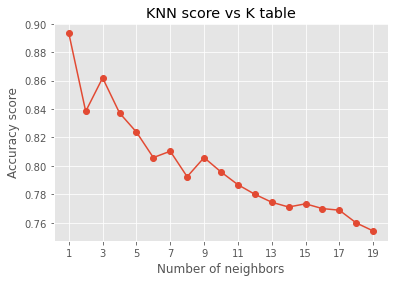

In [70]:
knnTable(20, features, target)

Based on the graph above, we see that accuracy score decreases as the number of neighbors increases. Hence, we will use n=1.

              precision    recall  f1-score   support

           0       0.81      0.77      0.79       110
           1       0.66      0.71      0.69        69

    accuracy                           0.75       179
   macro avg       0.74      0.74      0.74       179
weighted avg       0.75      0.75      0.75       179



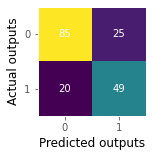

AUC - ROC score 0.7414361001317523


In [71]:
# train and create model using test and train data
model_knn=KNeighborsClassifier(n_neighbors=1).fit(x_train, y_train)

# evaluate
y_pred=model_knn.predict(x_test)
print(classification_report(y_test, y_pred))
visualizeCM(confusion_matrix(y_test, y_pred))
print("AUC - ROC score", roc_auc_score(y_test, y_pred))

Based on n=1, we actually see a decrease in the accuracy score by 1%. However, interestingly enough, we found that:
- precision is higher for 0 - not survived 
- recall is significantly higher for 1 - survived.

When we look back at the definition of these two:
- precision: what proportion of positive identifications was actually correct?
- recall: what propotion of actual positives was identified correctly?

These then imply that the second model managed to:
- precision: correctly identified 81% the ones that did not survived was actually did not survive among all data 
- recall: correctly identified 71% the survivors among the ones that survives.

When we take the AUC - ROC score into consideration, we found that:
- first model (n=default): 73%
- second model (n=1): 74%

Hence, we will go with the second model.

In [72]:
# store the evaluation metrics
all_scores["KNN"] = scoreStorage(y_test, y_pred)

##### Overfitting Test
- Evaluate the model using the train data

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       439
           1       0.88      0.86      0.87       273

    accuracy                           0.90       712
   macro avg       0.90      0.90      0.90       712
weighted avg       0.90      0.90      0.90       712



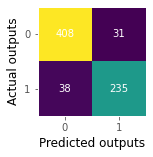

In [73]:
# evaluate
y_pred=model_knn.predict(x_train)
print(classification_report(y_train, y_pred))

visualizeCM(confusion_matrix(y_train, y_pred))

Accuracy scores between the model tested using the train and test data are far different (~15%), therefore it can be concluded that this model is not acceptable (overfit).

In [74]:
# store overfitting information
overfitting["KNN"]="yes"
print(overfitting)

{'RF': 'yes', 'DT': 'yes', 'LR': 'no', 'KNN': 'yes'}


#### Analysis:
- initial model using the default parameter is at 76% accuracy
- by iterating through a range of numbers (up to n=19), we found that accuracy score is at its peak when n=1, however when we run it, we see that accuracy is decreasing by 1%
- with n=1, we do not get the model with the highest accuracy (only get 75% model accuracy), but with a model that performs better in terms of distinguishing between the two results
- with high accuracy score difference (~15%) between testing and training data, we can assume this model is overfitting.

----------------------------------------
### Support Vector Machine (SVM)
We will test our machine using four available kernel functions:
- linear
- polynomial
- rbf
- sigmoid.

As it is most recommended to normalise the data when we are using SVM method ([source](https://towardsdatascience.com/support-vector-machine-explained-8d75fe8738fd)), we will also test the different models using the non-normalised and the normalised data. In this case, we only normalise the 'Fare' data. 

#### Non-normalised Data

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       110
           1       0.73      0.71      0.72        69

    accuracy                           0.79       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.79      0.79      0.79       179



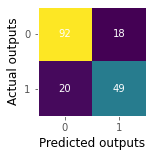

AUC - ROC score 0.7732542819499342


In [75]:
# create and train model
model_svc=SVC(kernel="linear").fit(x_train, y_train)

# evaluate model
y_pred=model_svc.predict(x_test)
liblin=classification_report(y_test, y_pred)
print(liblin)

visualizeCM(confusion_matrix(y_test, y_pred))
print("AUC - ROC score", roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.72      0.68       110
           1       0.47      0.39      0.43        69

    accuracy                           0.59       179
   macro avg       0.56      0.55      0.55       179
weighted avg       0.58      0.59      0.58       179



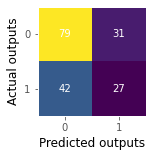

AUC - ROC score 0.5547430830039526


In [76]:
# create and train model
model_svc=SVC(kernel="sigmoid").fit(x_train, y_train)

# evaluate model
y_pred=model_svc.predict(x_test)
liblin=classification_report(y_test, y_pred)
print(liblin)

visualizeCM(confusion_matrix(y_test, y_pred))
print("AUC - ROC score", roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.99      0.77       110
           1       0.86      0.09      0.16        69

    accuracy                           0.64       179
   macro avg       0.75      0.54      0.47       179
weighted avg       0.72      0.64      0.54       179



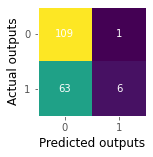

AUC - ROC score 0.5389328063241107


In [77]:
# create and train model
model_svc=SVC(kernel="poly").fit(x_train, y_train)

# evaluate model
y_pred=model_svc.predict(x_test)
liblin=classification_report(y_test, y_pred)
print(liblin)

visualizeCM(confusion_matrix(y_test, y_pred))
print("AUC - ROC score", roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.95      0.80       110
           1       0.79      0.33      0.47        69

    accuracy                           0.71       179
   macro avg       0.74      0.64      0.63       179
weighted avg       0.73      0.71      0.67       179



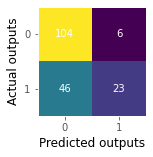

AUC - ROC score 0.6393939393939393


In [78]:
# create and train model
model_svc=SVC(kernel="rbf").fit(x_train, y_train)

# evaluate model
y_pred=model_svc.predict(x_test)
liblin=classification_report(y_test, y_pred)
print(liblin)

visualizeCM(confusion_matrix(y_test, y_pred))
print("AUC - ROC score", roc_auc_score(y_test, y_pred))

As linear gives out the highest accuracy, we will test this method for overfitting.

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       110
           1       0.73      0.71      0.72        69

    accuracy                           0.79       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.79      0.79      0.79       179



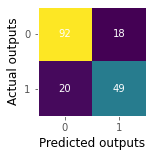

AUC - ROC score 0.7732542819499342


In [79]:
# create and train model
model_svc=SVC(kernel="linear").fit(x_train, y_train)

# evaluate model
y_pred=model_svc.predict(x_test)
liblin=classification_report(y_test, y_pred)
print(liblin)

visualizeCM(confusion_matrix(y_test, y_pred))
print("AUC - ROC score", roc_auc_score(y_test, y_pred))

#### Normalised data

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       110
           1       0.73      0.71      0.72        69

    accuracy                           0.79       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.79      0.79      0.79       179



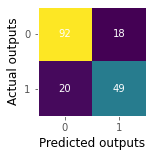

AUC - ROC score 0.7732542819499342


In [80]:
# create and train model
model_svc=SVC(kernel="linear").fit(x_train_svm, y_train_svm)

# evaluate model
y_pred=model_svc.predict(x_test_svm)
liblin=classification_report(y_test_svm, y_pred)
print(liblin)

visualizeCM(confusion_matrix(y_test_svm, y_pred))
print("AUC - ROC score", roc_auc_score(y_test_svm, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.80      0.81       110
           1       0.69      0.71      0.70        69

    accuracy                           0.77       179
   macro avg       0.75      0.76      0.75       179
weighted avg       0.77      0.77      0.77       179



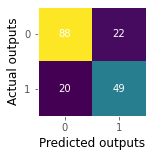

AUC - ROC score 0.755072463768116


In [81]:
# create and train model
model_svc=SVC(kernel="sigmoid").fit(x_train_svm, y_train_svm)

# evaluate model
y_pred=model_svc.predict(x_test_svm)
liblin=classification_report(y_test_svm, y_pred)
print(liblin)

visualizeCM(confusion_matrix(y_test_svm, y_pred))
print("AUC - ROC score", roc_auc_score(y_test_svm, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       110
           1       0.77      0.68      0.72        69

    accuracy                           0.80       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.80      0.80      0.80       179



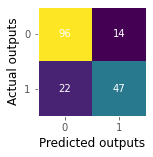

AUC - ROC score 0.7769433465085639


In [82]:
# create and train model
model_svc=SVC(kernel="rbf").fit(x_train_svm, y_train_svm)

# evaluate model
y_pred=model_svc.predict(x_test_svm)
liblin=classification_report(y_test_svm, y_pred)
print(liblin)

visualizeCM(confusion_matrix(y_test_svm, y_pred))
print("AUC - ROC score", roc_auc_score(y_test_svm, y_pred))

In [83]:
# store the evaluation metrics
all_scores["SVM"] = scoreStorage(y_test, y_pred)

##### Overfitting Test
- Evaluate the model using the train data

              precision    recall  f1-score   support

           0       0.62      1.00      0.76       439
           1       0.00      0.00      0.00       273

    accuracy                           0.62       712
   macro avg       0.31      0.50      0.38       712
weighted avg       0.38      0.62      0.47       712



/home/law/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/law/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/law/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


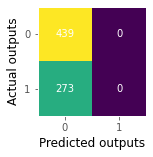

In [84]:
# evaluate
y_pred=model_svc.predict(x_train)
print(classification_report(y_train, y_pred))

visualizeCM(confusion_matrix(y_train, y_pred))

Comparing the two accuracy scores, the model suggests that the it is overfitting as there is 18% difference between the training and test dataset.

In [85]:
# store overfitting information
overfitting["SVM"]="yes"
print(overfitting)

{'RF': 'yes', 'DT': 'yes', 'LR': 'no', 'KNN': 'yes', 'SVM': 'yes'}


#### Analysis:
- different kernel using the non-normalised dataset gives out different model accuracy:
    - linear 79%
    - sigmoid 71%
    - poly 74%
    - rbf 77%
- based on the accuracy score, we will proceed with the linear solver
- with no difference between the model tested against the training and test dataset, we can assume that this model is acceptable (not overfitting).

--------------------------------------
### Naive Bayes

              precision    recall  f1-score   support

           0       0.85      0.79      0.82       110
           1       0.70      0.78      0.74        69

    accuracy                           0.79       179
   macro avg       0.78      0.79      0.78       179
weighted avg       0.79      0.79      0.79       179



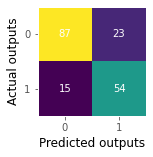

AUC - ROC score 0.7867588932806323


In [86]:
# create and train model
model_nb=GaussianNB().fit(x_train, y_train)

# evaluate
y_pred=model_nb.predict(x_test)
print(classification_report(y_test, y_pred))
visualizeCM(confusion_matrix(y_test, y_pred))
print("AUC - ROC score", roc_auc_score(y_test, y_pred))

In [87]:
# store the evaluation metrics
all_scores["NB"] = scoreStorage(y_test, y_pred)

##### Overfitting Test
- Evaluate the model using the train data

              precision    recall  f1-score   support

           0       0.82      0.83      0.83       439
           1       0.72      0.71      0.72       273

    accuracy                           0.79       712
   macro avg       0.77      0.77      0.77       712
weighted avg       0.79      0.79      0.79       712



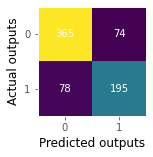

In [88]:
# evaluate
y_pred=model_nb.predict(x_train)
print(classification_report(y_train, y_pred))

visualizeCM(confusion_matrix(y_train, y_pred))

With no diference on model accuracy once tested using training and test data, this model is considered to be acceptable (not overfitting).

In [89]:
# store overfitting information
overfitting["NB"]="no"
print(overfitting)

{'RF': 'yes', 'DT': 'yes', 'LR': 'no', 'KNN': 'yes', 'SVM': 'yes', 'NB': 'no'}


#### Analysis:
- model accuracy is at 79%
- auc - roc score is at ~79%
- model does not overfit as the accuracy between the two is the same (at 79%), there is only a slight difference between precision, recall and f1 score between the two.

---------------------
### Analysis

In [90]:
# create a dataframe based on the metrics
df_metrics=pd.DataFrame(all_scores).T
df_metrics

,accuracy,auc_roc,recall_0,recall_1,precision_0,precision_1,f1_score_0,f1_score_1
RF,0.826816,0.818577,0.854545,0.782609,0.862385,0.771429,0.858447,0.776978
DT,0.826816,0.810474,0.881818,0.739130,0.843478,0.796875,0.862222,0.766917
LR,0.798883,0.779644,0.863636,0.695652,0.818966,0.761905,0.840708,0.727273
KNN,0.748603,0.741436,0.772727,0.710145,0.809524,0.662162,0.790698,0.685315
SVM,0.798883,0.776943,0.872727,0.681159,0.813559,0.770492,0.842105,0.723077
NB,0.787709,0.786759,0.790909,0.782609,0.852941,0.701299,0.820755,0.739726


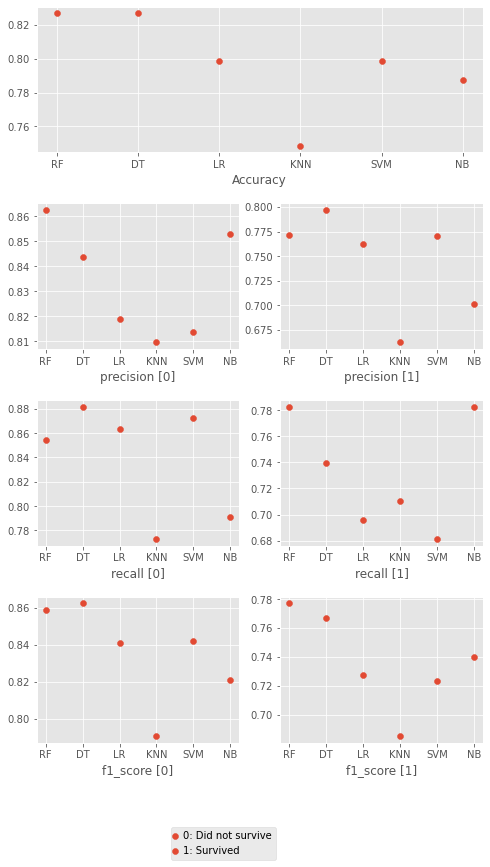

In [91]:
# plot the data in one figure
fig = plt.figure(figsize=(8, 14))
spec = gridspec.GridSpec(ncols=2, nrows=4, figure=fig)

axbig = fig.add_subplot(spec[0, :2])
axbig.scatter(df_metrics.index, df_metrics['accuracy'], marker='o', linestyle='None')#, label='Accuracy')
# axbig.title("All Scores of Each Model")
axbig.set_xlabel('Accuracy')

for nr, col in zip(range(1, 4), ['precision', 'recall', 'f1_score']):
    for p in [0, 1]:
        fig_temp = fig.add_subplot(spec[nr, p])
        fig_temp.scatter(df_metrics.index, df_metrics[f'{col}_{p}'], marker='o', linestyle='None')
        fig_temp.set_xlabel(f'{col} [{p}]')

fig.subplots_adjust(hspace=0.35, bottom=0.15)

fig.legend(['0: Did not survive', '1: Survived'], loc='center', bbox_to_anchor=(0.45, 0.05), handlelength=0);

From the graph above, we can see that:
- K-Nearest Neighbor has the lowest accuracy compared to the rest, while Random Forest ranks first
- K-Nearest Neighbor ranks lowest for all scores except recall for the non-survivor
- Support Vector Machine ranks the lowest for recall for the non-survivor
- Naive Bayes scores the highest for recall for the survivor
- Decision Tree ranks first for recall for the non-survivor, while Naive Bayes ranks first for the survivor recall
- Random Forest has the highest f1 score for both survivors and non-survivors.

In [92]:
# append overfitting information
df_metrics['overfit'] = pd.Series(overfitting)
df_metrics.sort_values(by=['accuracy'], ascending=False)

,accuracy,auc_roc,recall_0,recall_1,precision_0,precision_1,f1_score_0,f1_score_1,overfit
RF,0.826816,0.818577,0.854545,0.782609,0.862385,0.771429,0.858447,0.776978,yes
DT,0.826816,0.810474,0.881818,0.739130,0.843478,0.796875,0.862222,0.766917,yes
LR,0.798883,0.779644,0.863636,0.695652,0.818966,0.761905,0.840708,0.727273,no
SVM,0.798883,0.776943,0.872727,0.681159,0.813559,0.770492,0.842105,0.723077,yes
NB,0.787709,0.786759,0.790909,0.782609,0.852941,0.701299,0.820755,0.739726,no
KNN,0.748603,0.741436,0.772727,0.710145,0.809524,0.662162,0.790698,0.685315,yes


Based on the table above we can summarise that:
- from highest to lowest accuracy is achieved by the following algorithms:
    - Random Forest 84%
    - Decision Tree 83%
    - Support Vector Machine 80% (kernel=linear)
    - Logistic Regression 80% (all solver yields to the same result)
    - Naive Bayes 79%
    - K-Nearest Neighbor 75% (n=default).
- when we consider overfitting, only three models are acceptable:
    - Logistic Regression
    - Support Vector Machine
    - Naive Bayes
- to ensure that the model manages to distinguish between the classes (survives and does not survive), we will take into account AUC-ROC score:
    - Logistic Regression 78%
    - Naive Bayes 79%
- if we dig deeper into the recall, precision and f1 score, we see that:
    - Logistic Regression has higher scores on: recall[0], precision[1], f1_score[1], while
    - Naive Bayes scores higher on: recall[1], precision[0] and f1_score[0]. 

With higher AUC ROC score, the model which used <b>Naive Bayes</b> algorithm suggests that it performs better in distinguishing between the two classes (AUC ROC score). Hence, this will be the chosen algorithm for the model.

Few things that must be kept in mind while running it using Naive Bayes algorithm are ([source](https://towardsdatascience.com/naive-bayes-classifier-explained-50f9723571ed)):
- assume that all features are independent
    - not all features are independent in real world situation
- works well with high-dimensional data.

--------------------------------------
## Test Dataset

Apply the same pre-processing as the train data:
- fill in the null values (using mode/median it is appropriate)
- drop the following columns:
    - age
    - name
    - ticket
    - cabin
- encode columns:
    - sex
    - embarked.

In [93]:
# import test data
df_test=pd.read_csv('test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [94]:
# check tail
df_test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [95]:
# check shape
df_test.shape

(418, 11)

In [96]:
# check for uniqueness
df_test.nunique()

PassengerId    418
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64

In [97]:
# set PassengerId as index
df_test.set_index('PassengerId', inplace=True)
df_test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [98]:
# check for null values
df_test.isnull().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

As 'Age' and 'Cabin' will be removed, we will only fill the 'Fare'. As 'Fare' is directly linked to 'Pclass', we will fill it with the median value of the corresponding class.

In [99]:
# check which class does it belong to
df_test[df_test['Fare'].isna()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [100]:
# find mode value
# create a dataframe for class 3
class3=df_test[df_test['Pclass']==3]

# calculate mode
fare_mode_3=class3['Fare'].mode()
fare_mode_3[0]

7.75

In [101]:
# fill in nan values for 'Fare'
df_test['Fare']=df_test['Fare'].fillna(fare_mode_3[0])
df_test[df_test['Fare'].isna()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,


The 'Fare' column no longer has null values.

In [102]:
# check for null values
df_test.isnull().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       327
Embarked      0
dtype: int64

In [103]:
# check for keys
df_test.keys()

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

In [104]:
# create a new dataframe for the selected columns: age, name, ticket, cabin
df_test_cleaned=df_test[['Pclass', 'Sex', 'SibSp', 'Parch',  'Fare', 'Embarked']]
df_test_cleaned.head()

,Pclass,Sex,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,
892,3,male,0,0,7.8292,Q
893,3,female,1,0,7.0000,S
894,2,male,0,0,9.6875,Q
895,3,male,0,0,8.6625,S
896,3,female,1,1,12.2875,S


In [105]:
# encode all columns that contain non-numerical value
encoder=LabelEncoder()

all_labelenconders={}

cols=['Sex', 'Embarked']

for name in cols:
    encoder=LabelEncoder()
    all_labelenconders[name]=encoder

    encoder.fit( df_test_cleaned[name] )
    df_test_cleaned[name +'_en'] = encoder.fit_transform( df_test_cleaned[name] )
    
    print("Class for "+ name+" "+ encoder.classes_)

['Class for Sex female' 'Class for Sex male']
['Class for Embarked C' 'Class for Embarked Q' 'Class for Embarked S']


/tmp/ipykernel_5264/3962125830.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_cleaned[name +'_en'] = encoder.fit_transform( df_test_cleaned[name] )


In [106]:
# check for header
df_test_cleaned.head()

,Pclass,Sex,SibSp,Parch,Fare,Embarked,Sex_en,Embarked_en
PassengerId,,,,,,,,
892,3,male,0,0,7.8292,Q,1,1
893,3,female,1,0,7.0000,S,0,2
894,2,male,0,0,9.6875,Q,1,1
895,3,male,0,0,8.6625,S,1,2
896,3,female,1,1,12.2875,S,0,2


In [107]:
# create features to be tested
features_test=df_test_cleaned[['Pclass', 'SibSp', 'Parch', 'Fare', 'Sex_en','Embarked_en']]

In [108]:
# run the model
y_pred=model_nb.predict(features_test)

# combine results
df_results=pd.DataFrame({'Name': df_test['Name'],
                'Survived': y_pred})

df_results.head()

,Name,Survived
PassengerId,,
892,"Kelly, Mr. James",0
893,"Wilkes, Mrs. James (Ellen Needs)",0
894,"Myles, Mr. Thomas Francis",0
895,"Wirz, Mr. Albert",0
896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0
